In [1]:
# this is unrelated to the class .. It just helps displaying all outputs in a cell instead of just last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

#### Loading the data from iris_not_clean.data with seperator '|'. Skipping rows 1 and 34.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import pylab as pl
import random

# Giving headers to the data to make it easier to read
iris_headers=['Sepal_length','Sepal_width','Petal_length','Petal_width','Species']
data=pd.read_csv("iris_not_clean.data", sep="|", header=None,names=iris_headers, skiprows=[1,34])

print("Displaying the table data: ")
data.head(4)  

Displaying the table data: 


,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


#### Counting number of rows and columns in the file

In [3]:
print("Rows and columns: " + str(data.shape))

Rows and columns: (153, 5)


#### Number of nulls in the file

In [4]:
print("The number of nulls in the file: "+str((data.isna().sum()).sum()))

The number of nulls in the file: 9


#### Finding the rows with nans.

In [5]:
print("All rows with nans: ")
data[data.isna().any(axis=1)]

All rows with nans: 


,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
28,5.2,3.4,NaN,0.2,Iris-setosa
29,NaN,NaN,NaN,NaN,NaN
44,NaN,3.2,2.1,NaN,NaN


#### Finding the number nans in each of these rows.

In [6]:
rowna_count=data.isna().sum(axis=1)
print("Number of nans for each row: ")
rowna_count[rowna_count>0]

Number of nans for each row: 


28    1
29    5
44    3
dtype: int64

#### Finding nans per column

In [7]:
print("Number of nans per column")
data.isna().sum()

Number of nans per column


Sepal_length    2
Sepal_width     1
Petal_length    2
Petal_width     2
Species         2
dtype: int64

#### Checking and fixing the 35th row data with provided correction [4.9,3.1,1.5,0.2,"Iris-setosa"]

In [8]:
print("Data from 35th row before change: " )
data.iloc[34]
data.iloc[34]=[4.9,3.1,1.5,0.2,"Iris-setosa"]
print("Data from 35th row after change: " )
data.iloc[34]

Data from 35th row before change: 


Sepal_length            5.5
Sepal_width             4.2
Petal_length            1.4
Petal_width             0.2
Species         Iris-setosa
Name: 34, dtype: object

Data from 35th row after change: 


Sepal_length            4.9
Sepal_width             3.1
Petal_length            1.5
Petal_width             0.2
Species         Iris-setosa
Name: 34, dtype: object

#### Checking and fixing the 38th row data with provided correction [4.9,3.6,1.4,0.1,"Iris-setosa"]

In [9]:
print("Data from 38th row before change: " )
data.iloc[38]
data.iloc[38]=[4.9,3.6,1.4,0.1,"Iris-setosa"]
print("Data from 38th row after change: " )
data.iloc[38]

Data from 38th row before change: 


Sepal_length            4.9
Sepal_width             3.1
Petal_length            1.5
Petal_width             0.1
Species         Iris-setosa
Name: 38, dtype: object

Data from 38th row after change: 


Sepal_length            4.9
Sepal_width             3.6
Petal_length            1.4
Petal_width             0.1
Species         Iris-setosa
Name: 38, dtype: object

# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per feature, i.e. grouped by features

#### Printing mean and variance for each column. Using describe on the data to print more information.

In [10]:
stats=pd.DataFrame()

stats["mean"]=data.mean()
print("The columnwise mean is "+"\n"+ str(stats["mean"])+"\n")



stats["Var"]=data.var()
print("The variance for each column"+ "\n" + str(stats["Var"]))

print("\n Describing the data: ")
data.describe()

The columnwise mean is 
Sepal_length    5.829801
Sepal_width     3.053289
Petal_length    3.747020
Petal_width     1.192053
Name: mean, dtype: float64

The variance for each column
Sepal_length    0.699973
Sepal_width     0.179724
Petal_length    3.113841
Petal_width     0.585136
Name: Var, dtype: float64

 Describing the data: 


,Sepal_length,Sepal_width,Petal_length,Petal_width
count,151.000000,152.000000,151.000000,151.000000
mean,5.829801,3.053289,3.747020,1.192053
std,0.836644,0.423939,1.764608,0.764942
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Cleaning data and dropping nan rows

In [11]:
data.dropna(inplace=True)
print("Checking for more nans: ")
data[data.isna().any(axis=1)]

Checking for more nans: 


,Sepal_length,Sepal_width,Petal_length,Petal_width,Species


#### Recalculate the mean and variance of each column

In [12]:
# For changin data type of column from object to float
data.Sepal_length=pd.to_numeric(data.Sepal_length)

stats=pd.DataFrame()

stats["mean"]=data.mean()
print("The mean for each column is "+"\n"+ str(stats["mean"])+"\n")



stats["Var"]=data.var()
print("The variance for each column is "+ "\n" + str(stats["Var"]))

The mean for each column is 
Sepal_length    5.834000
Sepal_width     3.050000
Petal_length    3.758000
Petal_width     1.198667
Name: mean, dtype: float64

The variance for each column is 
Sepal_length    0.701991
Sepal_width     0.181174
Petal_length    3.116412
Petal_width     0.582414
Name: Var, dtype: float64


#### Finding the correlation between the fourth column and other 2 columns individually. Noting down observations

In [13]:
print("Correlation between Petal width and Petal length is " + str(data['Petal_width'].corr(data['Petal_length'])))
print("Correlation between Petal width and Sepal width is " + str(data['Petal_width'].corr(data['Sepal_width'])))
print("Correlation between Petal width and Sepal length is " + str(data['Petal_width'].corr(data['Sepal_length'])))
print("\n Observations:")
print("Petal_width and Petal_length are positively correlated that is if one increases other will also increase.")
print("Petal_width and Sepal_width are negatively correlated that is if one increases other will decrease.")
print("Petal_width and Sepal_length are positively correlated that is if one increases other will also increase.")

Correlation between Petal width and Petal length is 0.9628049458718135
Correlation between Petal width and Sepal width is -0.351855080637611
Correlation between Petal width and Sepal length is 0.8230783463565982

 Observations:
Petal_width and Petal_length are positively correlated that is if one increases other will also increase.
Petal_width and Sepal_width are negatively correlated that is if one increases other will decrease.
Petal_width and Sepal_length are positively correlated that is if one increases other will also increase.


#### Finding the number of records for each class(species).

In [14]:
records_perclass=data.groupby('Species').Species.count()
print("Number for records per class(Species): ")
records_perclass

Number for records per class(Species): 


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Changing the random seed to 1234.

In [15]:
np.random.seed(1234)

#### Randomly pick 20 samples of the data and display it.

In [16]:
random_number=np.random.randint(0,151, size=20)
random_number
generating_twenty_samples=data.iloc[random_number]
print("Displaying the 20 selected rows: ")
generating_twenty_samples

array([ 47,  38,  53, 116, 143,  23,  30, 124,  26, 118, 120, 112,  69,
        80, 127,  50,  76,  37,  34, 139])

Displaying the 20 selected rows: 


,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
50,5.3,3.7,1.5,0.2,Iris-setosa
40,5.1,3.4,1.5,0.2,Iris-setosa
56,5.5,2.3,4.0,1.3,Iris-versicolor
119,6.5,3.0,5.5,1.8,Iris-virginica
146,6.8,3.2,5.9,2.3,Iris-virginica
23,5.1,3.3,1.7,0.5,Iris-setosa
32,5.4,3.4,1.5,0.4,Iris-setosa
127,6.7,3.3,5.7,2.1,Iris-virginica
26,5.0,3.4,1.6,0.4,Iris-setosa
121,7.7,2.6,6.9,2.3,Iris-virginica


#### Plot histogram for all the data attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D2AB6FABE0>,
      dtype=object)

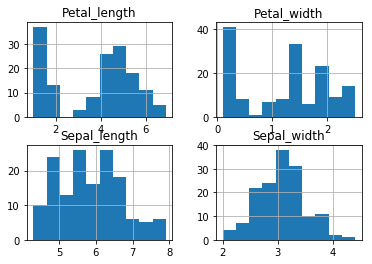

In [17]:
data.hist()
plt.show()

#### Plot histogram for all the data attributes per feature, i.e. grouped by features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D2ABF93400>,
      dtype=object)

Text(0.5,1.05,'Grouping by species for column Petal_length')

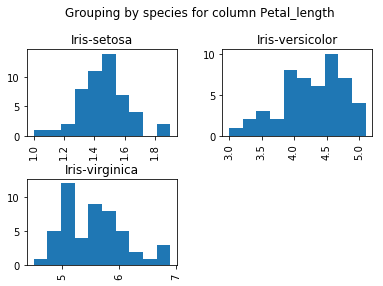

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D2AC0AD240>,
      dtype=object)

Text(0.5,1.05,'Grouping by species for column Petal_width')

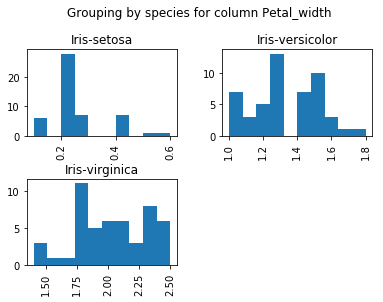

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D2AC069358>,
      dtype=object)

Text(0.5,1.05,'Grouping by species for column Sepal_length')

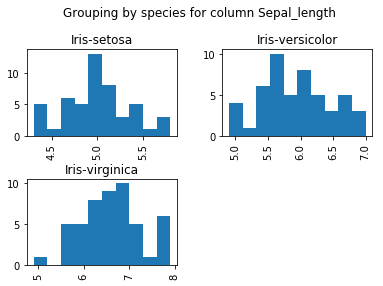

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D2AC0F34E0>,
      dtype=object)

Text(0.5,1.05,'Grouping by species for column Sepal_width')

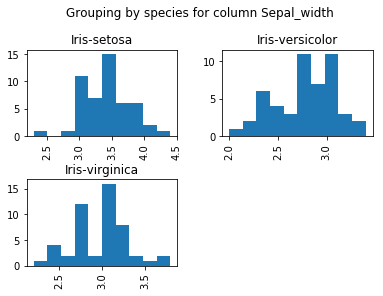

In [18]:
data.hist(by='Species',column='Petal_length')
plt.suptitle("Grouping by species for column Petal_length",x=0.5, y=1.05, ha='center')
plt.show()
data.hist(by='Species',column='Petal_width') 
plt.suptitle("Grouping by species for column Petal_width",x=0.5, y=1.05, ha='center')
plt.show()
data.hist(by='Species',column='Sepal_length') 
plt.suptitle("Grouping by species for column Sepal_length",x=0.5, y=1.05, ha='center')
plt.show()
data.hist(by='Species',column='Sepal_width')
plt.suptitle("Grouping by species for column Sepal_width",x=0.5, y=1.05, ha='center')
plt.show()

# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

#### Using Scipy pdf to do a curve fitting for petal-length

In [19]:
train_data_pdf=data.Petal_length
guessed_pdf=scipy.stats.kde.gaussian_kde(train_data_pdf)


#### Plotting the normalized histogrm of the petal-length and the estimated pdf on the same figure

(array([0.4180791 , 0.14689266, 0.        , 0.03389831, 0.09039548,
        0.29378531, 0.32768362, 0.20338983, 0.12429379, 0.05649718]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'Petal-length')

Text(0,0.5,'Density')

Text(0.5,1,'Normalised Histogram and estimated PDF')

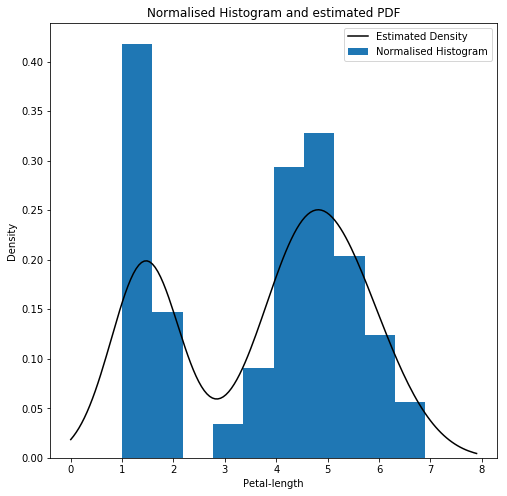

In [20]:
f=plt.figure(figsize=(8,8))


test_data_pdf=np.linspace(train_data_pdf.min()-1,train_data_pdf.max()+1, len(train_data_pdf))


plt.hist(train_data_pdf, density=True, label='Normalised Histogram')
plt.plot(test_data_pdf, guessed_pdf(test_data_pdf), 'k-', label='Estimated Density')
plt.xlabel('Petal-length')
plt.ylabel('Density')
plt.legend()
plt.title('Normalised Histogram and estimated PDF')
plt.show()

#### Generate new 500 samples using the estimated pdf for the petal-length

In [21]:
#Generate new 500 samples using the estimated pdf for the petal-length
random_pdf_sample=guessed_pdf.resample(500)[0]
print("Generated 500 new samples using estimated pdf: ")
random_pdf_sample.shape

Generated 500 new samples using estimated pdf: 


(500,)

#### Calculating the mean of the new samples.

In [22]:
new_estimated_mean=random_pdf_sample.mean()
print("Mean of new samples: " + str(new_estimated_mean))

Mean of new samples: 3.7038321651804553


#### Compare the mean of given data and mean of new samples

In [23]:
old_mean=train_data_pdf.mean()
print("Mean of given data for petal_length " + str(old_mean))
print("\nThe mean of the actual data is greater than the mean of the sample of the estimated data.")
print("The two means are quite close with a difference of " + str((old_mean - new_estimated_mean)))

Mean of given data for petal_length 3.7580000000000027

The mean of the actual data is greater than the mean of the sample of the estimated data.
The two means are quite close with a difference of 0.054167834819547345


### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

#### Using Scikit to do PCA on the IRIS dataset

In [24]:
from sklearn.decomposition import PCA
#Defining the columns with features
features=['Sepal_length','Sepal_width','Petal_length','Petal_width']

# Separating out the features.
feature_set=data.loc[:,features]

#Separating out the target column
target=data.Species

#Finding PCA for all features

pca_all=PCA()
data_pca=pca_all.fit_transform(feature_set)

#### Creating a bar plot that shows the importance of info in each of the new dimensions

<BarContainer object of 4 artists>

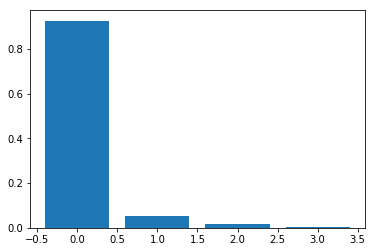

In [25]:
plt.bar(np.arange(4), pca_all.explained_variance_ratio_)
plt.show()

#### Using PCA to reduce the number of attributes by 1.

<BarContainer object of 3 artists>

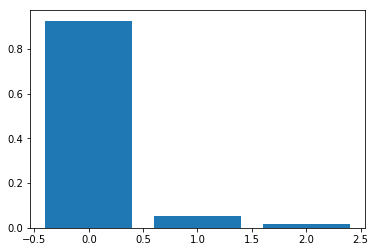

In [26]:
#Using one less component for PCA
pca_reduced=PCA(n_components=3)
reduced_data_pca=pca_reduced.fit_transform(feature_set)
plt.bar(np.arange(3), pca_reduced.explained_variance_ratio_)

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

#### Use Kmeans to divide the data into different clusters. Number of clusters = number of categories.

In [27]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(reduced_data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Creating scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

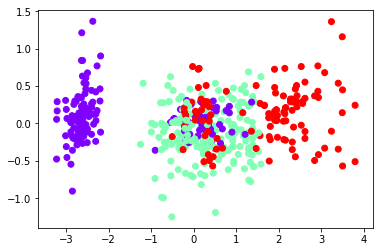

In [28]:
plt.scatter(reduced_data_pca[:,0],reduced_data_pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(reduced_data_pca[:,0],reduced_data_pca[:,2], c=kmeans.labels_, cmap='rainbow')
plt.scatter(reduced_data_pca[:,1],reduced_data_pca[:,2], c=kmeans.labels_, cmap='rainbow')
plt.show()

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

#### Creating 80% training and 20% validation data set.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reduced_data_pca, target,train_size=.80,test_size=.20)

#### Creating Logistic regression model for reduced IRIS dataset.

In [30]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### What is the training accuracy

In [31]:
training_score =  logisticRegr.score(X_train,y_train)
print("The training accuracy is " + str(training_score))

The training accuracy is 0.9166666666666666


#### What is the validation accuracy

In [32]:
validation_score = logisticRegr.score(X_test, y_test)
print("The validation accuracy is " + str(validation_score))

The validation accuracy is 0.8666666666666667


#### Forming the confusion matrix

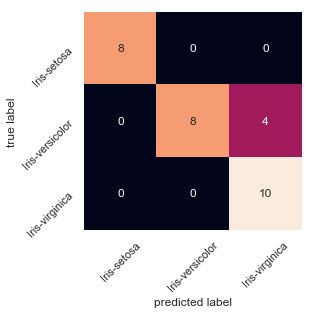

In [33]:
from sklearn import metrics
import seaborn as sns; sns.set()

#Forming the confusion matrix
logistic_pred=logisticRegr.predict(X_test)
cm=metrics.confusion_matrix(y_test, logistic_pred)

#Displaying the metrics
species_names=np.unique(data.Species)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species_names,
            yticklabels=species_names)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel('true label')
plt.xlabel('predicted label');

In [35]:
plt.close()